In [4]:
import pandas as pd

df = pd.read_csv('./data/train.csv')

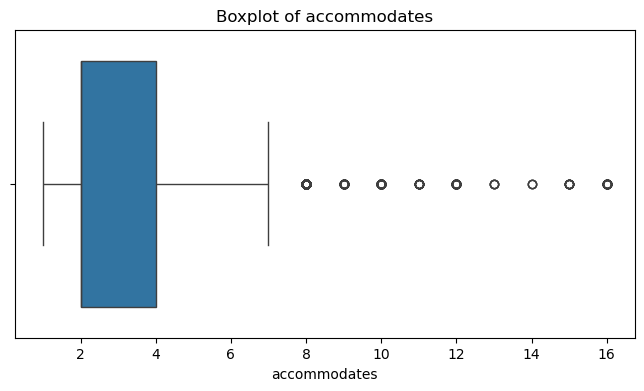

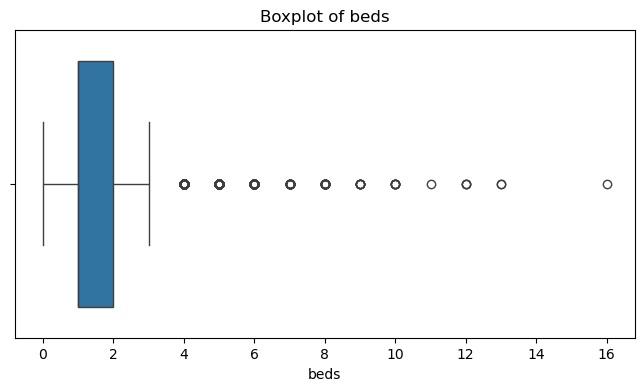

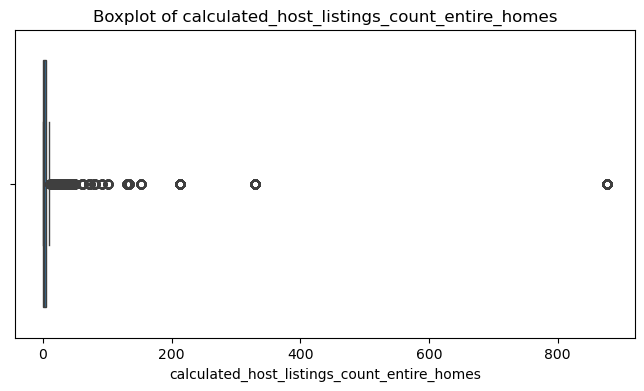

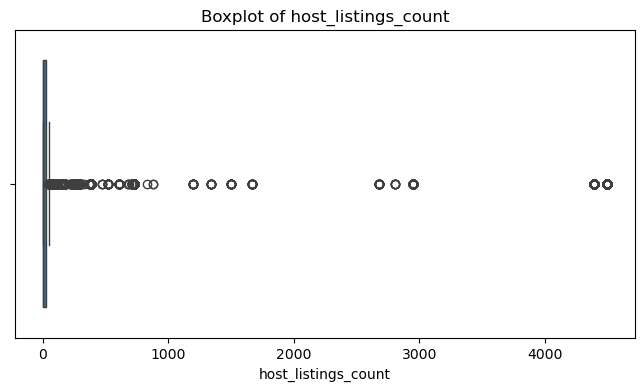

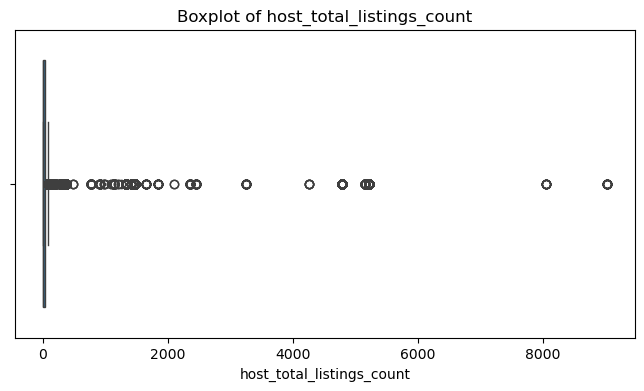

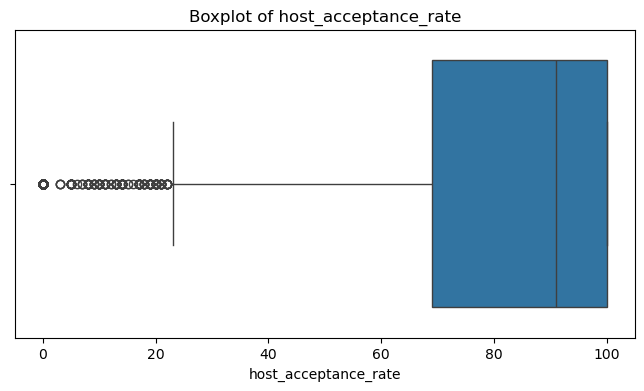

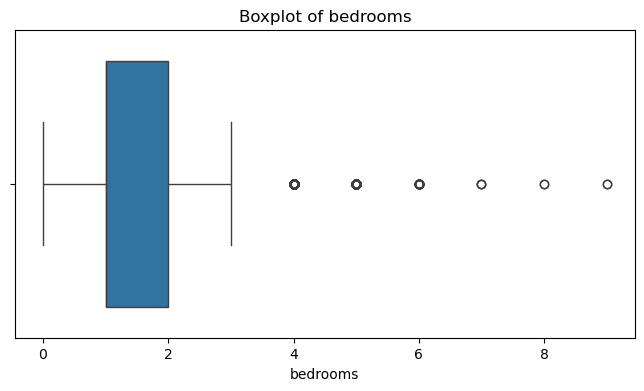

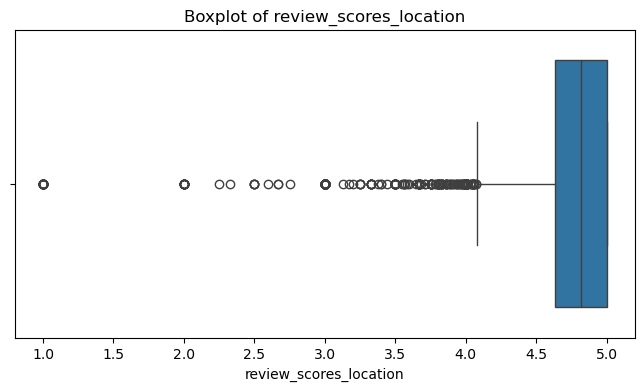

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

features = ['accommodates', 'beds', 'calculated_host_listings_count_entire_homes',
            'host_listings_count', 'host_total_listings_count', 
            'host_acceptance_rate', 'bedrooms', 'review_scores_location']

for feature in features:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=df[feature])
    plt.title(f'Boxplot of {feature}')
    plt.show()


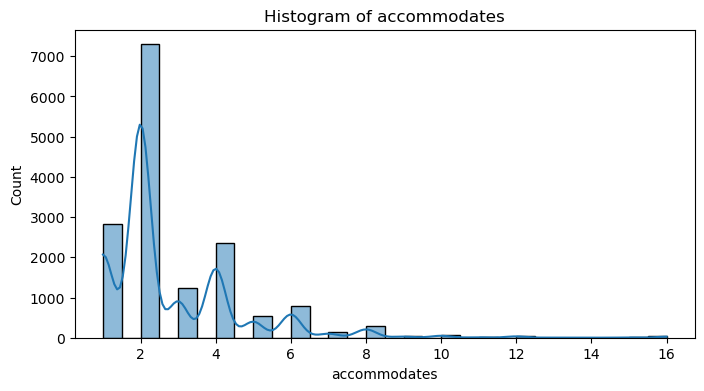

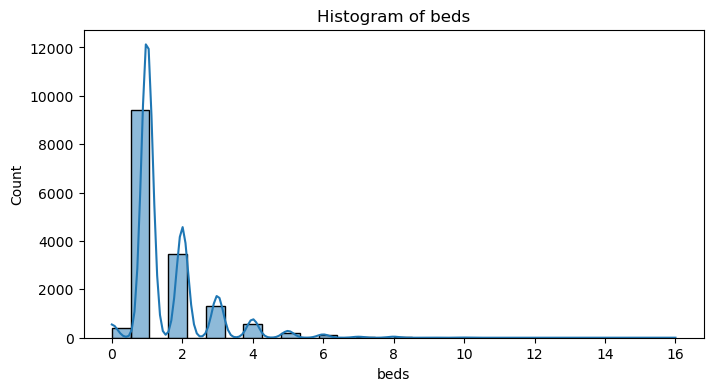

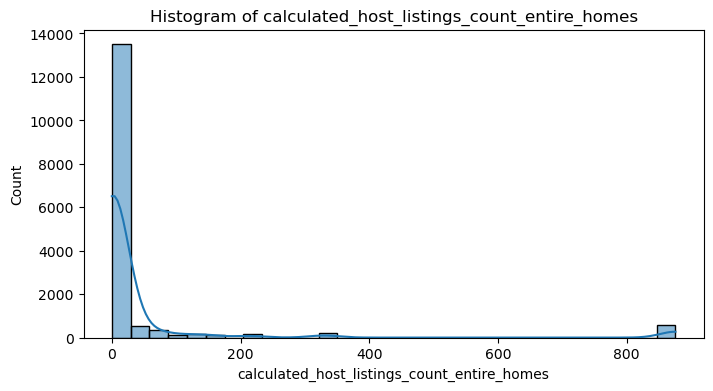

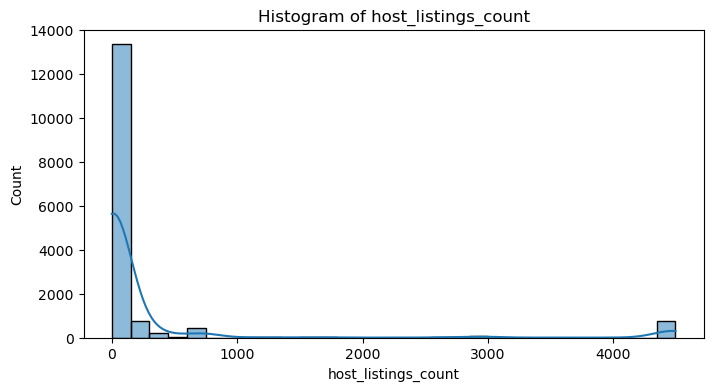

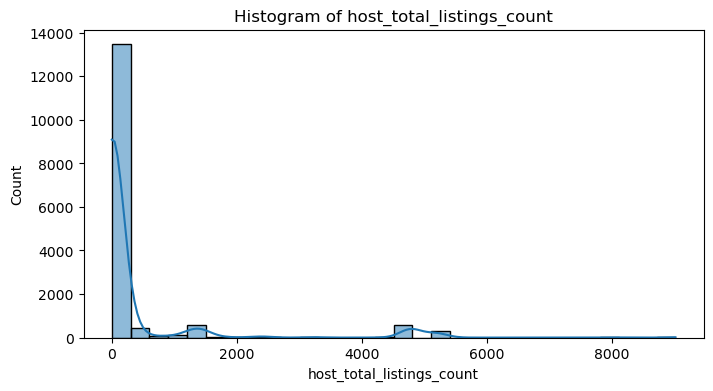

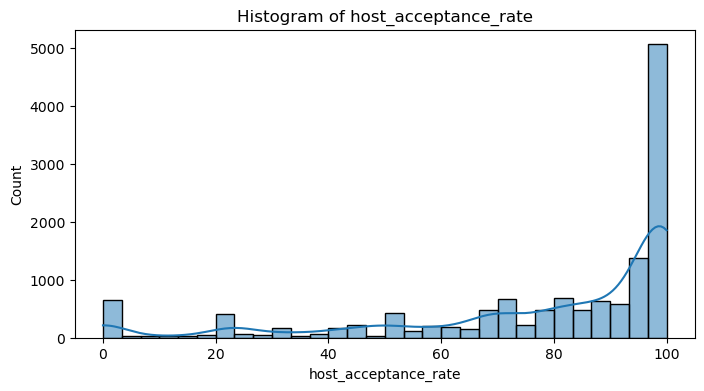

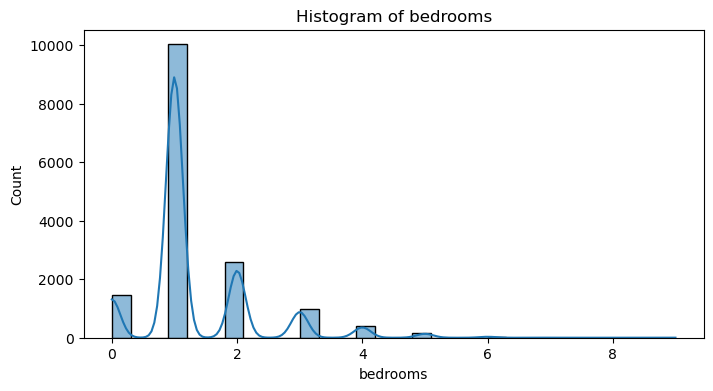

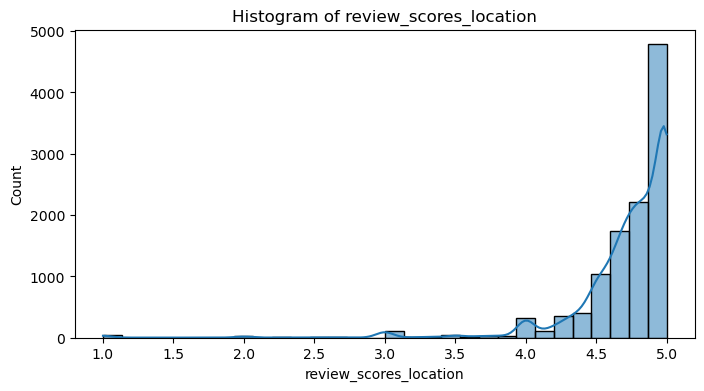

In [6]:
for feature in features:
    plt.figure(figsize=(8, 4))
    sns.histplot(df[feature], bins=30, kde=True)
    plt.title(f'Histogram of {feature}')
    plt.show()


In [12]:
print(df[features].isnull().sum())
print(f"Dataset length: {len(df)}")


accommodates                                      0
beds                                             84
calculated_host_listings_count_entire_homes       0
host_listings_count                               0
host_total_listings_count                         0
host_acceptance_rate                           2053
bedrooms                                         34
review_scores_location                         4475
dtype: int64
Dataset length: 15696


In [15]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.metrics import classification_report

# Load the training dataset
train_data = pd.read_csv('./data/train.csv')

# Define features to use
features = [
    'accommodates', 
    'beds', 
    'calculated_host_listings_count_entire_homes',
    'host_listings_count', 
    'host_total_listings_count', 
    'host_acceptance_rate', 
    'bedrooms', 
    'review_scores_location'
]

# Drop rows with missing values for the relevant features and target
train_data = train_data[features + ['price']].dropna()

# Define features and target
X = train_data[features]
y = train_data['price']

# Split into train and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Initialize and train the XGBoost model
model = XGBClassifier(
    use_label_encoder=False, 
    eval_metric='mlogloss',  # Multi-class log loss
    random_state=42
)
model.fit(X_train, y_train)

# Make predictions on the validation set
y_pred = model.predict(X_val)

# Evaluate the model
print("Classification Report:")
print(classification_report(y_val, y_pred))


/home/users/mas296/micromamba/envs/cs671/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [14:43:35] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1730232887822/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Classification Report:
              precision    recall  f1-score   support

           0       0.62      0.72      0.67       311
           1       0.41      0.43      0.42       357
           2       0.38      0.37      0.38       368
           3       0.44      0.41      0.42       385
           4       0.40      0.39      0.39       307
           5       0.61      0.55      0.58       257

    accuracy                           0.47      1985
   macro avg       0.48      0.48      0.48      1985
weighted avg       0.47      0.47      0.47      1985

